# TP 1: LDA/QDA y optimización matemática de modelos

Integrantes:

Brazón, Josmar

Pardo, Sebastián

González, Martín



# Intro teórica

## Definición: Clasificador Bayesiano

Sean $k$ poblaciones, $x \in \mathbb{R}^p$ puede pertenecer a cualquiera $g \in \mathcal{G}$ de ellas. Bajo un esquema bayesiano, se define entonces $\pi_j \doteq P(G = j)$ la probabilidad *a priori* de que $X$ pertenezca a la clase *j*, y se **asume conocida** la distribución condicional de cada observable dado su clase $f_j \doteq f_{X|G=j}$.

De esta manera dicha probabilidad *a posteriori* resulta
$$
P(G|_{X=x} = j) = \frac{f_{X|G=j}(x) \cdot p_G(j)}{f_X(x)} \propto f_j(x) \cdot \pi_j
$$

La regla de decisión de Bayes es entonces
$$
H(x) \doteq \arg \max_{g \in \mathcal{G}} \{ P(G|_{X=x} = j) \} = \arg \max_{g \in \mathcal{G}} \{ f_j(x) \cdot \pi_j \}
$$

es decir, se predice a $x$ como perteneciente a la población $j$ cuya probabilidad a posteriori es máxima.

*Ojo, a no desesperar! $\pi_j$ no es otra cosa que una constante prefijada, y $f_j$ es, en su esencia, un campo escalar de $x$ a simplemente evaluar.*

## Distribución condicional

Para los clasificadores de discriminante cuadrático y lineal (QDA/LDA) se asume que $X|_{G=j} \sim \mathcal{N}_p(\mu_j, \Sigma_j)$, es decir, se asume que cada población sigue una distribución normal.

Por definición, se tiene entonces que para una clase $j$:
$$
f_j(x) = \frac{1}{(2 \pi)^\frac{p}{2} \cdot |\Sigma_j|^\frac{1}{2}} e^{- \frac{1}{2}(x-\mu_j)^T \Sigma_j^{-1} (x- \mu_j)}
$$

Aplicando logaritmo (que al ser una función estrictamente creciente no afecta el cálculo de máximos/mínimos), queda algo mucho más práctico de trabajar:

$$
\log{f_j(x)} = -\frac{1}{2}\log |\Sigma_j| - \frac{1}{2} (x-\mu_j)^T \Sigma_j^{-1} (x- \mu_j) + C
$$

Observar que en este caso $C=-\frac{p}{2} \log(2\pi)$, pero no se tiene en cuenta ya que al tener una constante aditiva en todas las clases, no afecta al cálculo del máximo.

## LDA

En el caso de LDA se hace una suposición extra, que es $X|_{G=j} \sim \mathcal{N}_p(\mu_j, \Sigma)$, es decir que las poblaciones no sólo siguen una distribución normal sino que son de igual matriz de covarianzas. Reemplazando arriba se obtiene entonces:

$$
\log{f_j(x)} =  -\frac{1}{2}\log |\Sigma| - \frac{1}{2} (x-\mu_j)^T \Sigma^{-1} (x- \mu_j) + C
$$

Ahora, como $-\frac{1}{2}\log |\Sigma|$ es común a todas las clases se puede incorporar a la constante aditiva y, distribuyendo y reagrupando términos sobre $(x-\mu_j)^T \Sigma^{-1} (x- \mu_j)$ se obtiene finalmente:

$$
\log{f_j(x)} =  \mu_j^T \Sigma^{-1} (x- \frac{1}{2} \mu_j) + C'
$$

## Entrenamiento/Ajuste

Obsérvese que para ambos modelos, ajustarlos a los datos implica estimar los parámetros $(\mu_j, \Sigma_j) \; \forall j = 1, \dots, k$ en el caso de QDA, y $(\mu_j, \Sigma)$ para LDA.

Estos parámetros se estiman por máxima verosimilitud, de manera que los estimadores resultan:

* $\hat{\mu}_j = \bar{x}_j$ el promedio de los $x$ de la clase *j*
* $\hat{\Sigma}_j = s^2_j$ la matriz de covarianzas estimada para cada clase *j*
* $\hat{\pi}_j = f_{R_j} = \frac{n_j}{n}$ la frecuencia relativa de la clase *j* en la muestra
* $\hat{\Sigma} = \frac{1}{n} \sum_{j=1}^k n_j \cdot s^2_j$ el promedio ponderado (por frecs. relativas) de las matrices de covarianzas de todas las clases. *Observar que se utiliza el estimador de MV y no el insesgado*

Es importante notar que si bien todos los $\mu, \Sigma$ deben ser estimados, la distribución *a priori* puede no inferirse de los datos sino asumirse previamente, utilizándose como entrada del modelo.

## Predicción

Para estos modelos, al igual que para cualquier clasificador Bayesiano del tipo antes visto, la estimación de la clase es por método *plug-in* sobre la regla de decisión $H(x)$, es decir devolver la clase que maximiza $\hat{f}_j(x) \cdot \hat{\pi}_j$, o lo que es lo mismo $\log\hat{f}_j(x) + \log\hat{\pi}_j$.

In [30]:
!pip install -q numpy pandas matplotlib scipy scikit-learn==1.6.1


In [31]:
!rm -rf /content/amia_tp1
!git clone -q -b mog --single-branch https://github.com/spardo83/amia_tp1.git /content/amia_tp1


In [32]:
!touch amia_tp1/base/__init__.py
!touch amia_tp1/utils/__init__.py


In [69]:
# clonar la rama correcta
!rm -rf /content/amia_tp1
!git clone -q -b mog --single-branch https://github.com/spardo83/amia_tp1.git /content/amia_tp1

# Asegurar los __init__.py en el LUGAR CORRECTO (dentro del repo clonado)
!touch /content/amia_tp1/base/__init__.py
!touch /content/amia_tp1/utils/__init__.py
!ls -lah /content/amia_tp1/base | head -n 20
!ls -lah /content/amia_tp1/utils | head -n 20

import sys, importlib, os
assert os.path.isfile("/content/amia_tp1/base/qda.py"), "No encuentro base/qda.py en el repo clonado"
sys.path = ['/content/amia_tp1'] + [p for p in sys.path if p != '/content/amia_tp1']
importlib.invalidate_caches()

# Importar
from base.qda import QDA, TensorizedQDA
from base.cholesky import QDA_Chol1, QDA_Chol2, QDA_Chol3
from utils.bench import Benchmark
from utils.datasets import get_wine_dataset, label_encode


total 20K
drwxr-xr-x 2 root root 4.0K Aug 17 04:56 .
drwxr-xr-x 6 root root 4.0K Aug 17 04:56 ..
-rw-r--r-- 1 root root 1.7K Aug 17 04:56 bayesian.py
-rw-r--r-- 1 root root 1.9K Aug 17 04:56 cholesky.py
-rw-r--r-- 1 root root    0 Aug 17 04:56 __init__.py
-rw-r--r-- 1 root root 1.7K Aug 17 04:56 qda.py
total 20K
drwxr-xr-x 2 root root 4.0K Aug 17 04:56 .
drwxr-xr-x 6 root root 4.0K Aug 17 04:56 ..
-rw-r--r-- 1 root root 4.8K Aug 17 04:56 bench.py
-rw-r--r-- 1 root root 1.4K Aug 17 04:56 datasets.py
-rw-r--r-- 1 root root    0 Aug 17 04:56 __init__.py


# Código provisto

Con el fin de no retrasar al alumno con cuestiones estructurales y/o secundarias al tema que se pretende tratar, se provee una base de código que **no es obligatoria de usar** pero se asume que resulta resulta beneficiosa.

In [70]:
# imports
import numpy as np
import numpy.linalg as LA

from base.qda import QDA, TensorizedQDA
from base.cholesky import QDA_Chol1, QDA_Chol2, QDA_Chol3
from utils.bench import Benchmark
from utils.datasets import (get_iris_dataset, get_letters_dataset,
                            get_penguins_dataset, get_wine_dataset,
                            label_encode)

## Base code

## Datasets

Observar que se proveen **4 datasets diferentes**, el código de ejemplo usa uno solo pero eso no significa que ustedes se limiten al mismo. También pueden usar otros datasets de su elección.

## Benchmarking

Nota: esta clase fue creada bastante rápido y no pretende ser una plataforma súper confiable sobre la que basarse, sino más bien una herramienta simple con la que poder medir varios runs y agregar la información.

En forma rápida, `warmup` es la cantidad de runs para warmup, `mem_runs` es la cantidad de runs en las que se mide el pico de uso de RAM y `n_runs` es la cantidad de runs en las que se miden tiempos.

La razón por la que se separan es que medir memoria hace ~2.5x más lento cada run, pero al mismo tiempo se estabiliza mucho más rápido.

**Importante:** tener en cuenta que los modelos que predicen en batch (usan `predict` directamente) deberían consumir, como mínimo, $n$ veces la memoria de los que predicen por observación.

## Ejemplo

In [35]:
# levantamos el dataset Wine, que tiene 13 features y 178 observaciones en total
X_full, y_full = get_wine_dataset()

X_full.shape, y_full.shape

((178, 13), (178, 1))

In [36]:
# encodeamos a número las clases
y_full_encoded = label_encode(y_full)

y_full[:5], y_full_encoded[:5]

(array([['class_0'],
        ['class_0'],
        ['class_0'],
        ['class_0'],
        ['class_0']], dtype='<U7'),
 array([[0],
        [0],
        [0],
        [0],
        [0]]))

In [37]:
# generamos el benchmark
# observar que son valores muy bajos de runs para que corra rápido ahora
b = Benchmark(
    X_full, y_full_encoded,
    n_runs = 100,
    warmup = 20,
    mem_runs = 20,
    test_sz = 0.3,
    same_splits = False
)

Benching params:
Total runs: 140
Warmup runs: 20
Peak Memory usage runs: 20
Running time runs: 100
Train size rows (approx): 125
Test size rows (approx): 53
Test size fraction: 0.3


In [38]:
# bencheamos un par
to_bench = [QDA]

for model in to_bench:
    b.bench(model)

QDA (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

QDA (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [39]:
# como es una clase, podemos seguir bencheando más después
b.bench(TensorizedQDA)

TensorizedQDA (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

TensorizedQDA (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
class FasterQDA(TensorizedQDA):
    def fit(self, X, y):
        # y como vector plano
        y = y.flatten() if y.ndim > 1 else y

        # priors en log
        counts = np.bincount(y)
        self.log_a_priori = np.log(counts / counts.sum())

        # parámetros del modelo (llena inv_covs/means y sus stacks tensoriales)
        self._fit_params(X, y)

    def predict(self, X):
        # Convención del TP: X tiene forma (p, n)
        p, n = X.shape

        # 1) Restamos medias por clase a TODAS las observaciones a la vez
        #    self.tensor_means: (K, p, 1)  -> broadcast con X[None, :, :] (1, p, n)
        diffs = X[None, :, :] - self.tensor_means   # -> (K, p, n)

        # 2) Forma cuadrática: (x-μ)^T Σ^{-1} (x-μ) en bloque
        #    inv: (K, p, p)  y diffs: (K, p, n)
        #    resultado intermedio: (K, p, n)
        left = np.einsum('kpq,kqn->kpn', self.tensor_inv_cov, diffs)

        #    producto elemento a elemento y suma en "p" -> (K, n)
        quad = np.einsum('kpn,kpn->kn', diffs, left)

        # 3) Términos extra por clase
        log_dets = np.log(np.linalg.det(self.tensor_inv_cov))      # (K,)
        scores = (-0.5 * quad - 0.5 * log_dets[:, None] + self.log_a_priori[:, None]).T  # (n, K)

        # 4) Elegimos la clase ganadora por observación
        return np.argmax(scores, axis=1).reshape(-1, 1)


In [41]:
b.bench(FasterQDA)


FasterQDA (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

FasterQDA (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
class EfficientQDA(TensorizedQDA):
    def fit(self, X, y):
        # y vector plano
        y = y.flatten() if y.ndim > 1 else y
        # log-priors por clase
        counts = np.bincount(y)
        self.log_a_priori = np.log(counts / counts.sum())
        # parámetros (inv covs y medias apiladas)
        self._fit_params(X, y)
        # opcional
        self.n_classes_ = len(self.log_a_priori)
        return self

    def predict(self, X):
        # *** Convención del TP: X debe ser (p, n) ***
        # Si viniera como (n, p), lo giro para que p coincida con self.tensor_means
        p_expected = self.tensor_means.shape[1]  # (K, p, 1)
        if X.shape[0] != p_expected:
            X = X.T  # ahora X es (p, n)

        # diffs: (K, p, n)  ← restamos medias por clase a TODAS las observaciones
        diffs = X[None, :, :] - self.tensor_means   # (K, p, n)

        # Aplicamos Σ^{-1} sin formar n×n:
        # left = Σ^{-1} * diffs  → (K, p, n)
        left = np.einsum('kpq,kqn->kpn', self.tensor_inv_cov, diffs)

        # Forma cuadrática por clase y observación: sumo en la dimensión p
        # quad[k, i] = sum_p diffs[k,p,i] * left[k,p,i]
        quad = np.einsum('kpn,kpn->kn', diffs, left)  # (K, n)

        # Términos por clase
        log_dets = np.log(np.linalg.det(self.tensor_inv_cov))      # (K,)
        scores = (-0.5 * quad
                  - 0.5 * log_dets[:, None]
                  + self.log_a_priori[:, None])                    # (K, n)

        # Ganadora por observación
        return np.argmax(scores, axis=0).reshape(-1, 1)


In [43]:
b.bench(EfficientQDA)


EfficientQDA (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

EfficientQDA (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [52]:
b.bench(QDA_Chol1)
b.bench(QDA_Chol2)
b.bench(QDA_Chol3)



QDA_Chol1 (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

QDA_Chol1 (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

QDA_Chol2 (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

QDA_Chol2 (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

QDA_Chol3 (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

QDA_Chol3 (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [51]:
import numpy as np

class TensorizedChol(QDA_Chol1):
    __name__ = "TensorizedChol"

    def _fit_params(self, X, y):
        # Reutilizamos el ajuste de QDA_Chol1 (calcula self.L_invs y self.means)
        super()._fit_params(X, y)

        # Tensores para vectorizar
        self.tensor_L_invs = np.stack(self.L_invs)              # (k, p, p)
        self.tensor_means  = np.stack(self.means)               # (k, p, 1)

        # log(prod(diag(L_inv))) por clase (vectorizado)
        diag_Linv = np.diagonal(self.tensor_L_invs, axis1=1, axis2=2)   # (k, p)
        self.log_diag_Linv_prod = np.sum(np.log(diag_Linv), axis=1)     # (k,)

    def _predict_log_conditionals(self, x):
        # x: (p,1) o (p,), lo normalizamos a (p,1)
        x = x.reshape(-1, 1)
        # (k, p, 1)
        unbiased = x[None, :, :] - self.tensor_means
        # y = L_inv @ (x - mu) -> (k, p, 1)
        y = self.tensor_L_invs @ unbiased
        quad = np.sum(y**2, axis=1).reshape(-1)           # (k,)
        # log P(x|k) hasta constante
        return self.log_diag_Linv_prod - 0.5*quad

    def _predict_one(self, x):
        return np.argmax(self.log_a_priori + self._predict_log_conditionals(x))


class EfficientChol(TensorizedChol):
    __name__ = "EfficientChol"

    def fit(self, X, y):
        super().fit(X, y)
        # También guardo medias en (k,p) para broadcasting con X en (n,p)
        self.means_2d = np.concatenate([m.T for m in self.means], axis=0)  # (k, p)
        return self

    def predict(self, X):
        # Aceptamos X en (n,p) o (p,n); lo dejamos en (n,p)
        X = X if X.shape[0] >= X.shape[1] else X.T
        n, p = X.shape
        k = self.tensor_L_invs.shape[0]

        # diffs: (n, k, p)
        diffs = X[:, None, :] - self.means_2d[None, :, :]

        # y = L_inv @ (x - mu) para todos n,k en lote:
        #   L_inv: (k,p,p)  -> expandimos a (1,k,p,p)
        #   diffs: (n,k,p)  -> expandimos a (n,k,p,1)
        y = np.matmul(self.tensor_L_invs[None, :, :, :], diffs[..., None])   # (n,k,p,1)
        y = y.squeeze(-1)                                                    # (n,k,p)

        quad = np.sum(y**2, axis=2)                    # (n,k)
        scores = -0.5*quad \
                 + self.log_diag_Linv_prod[None, :] \
                 + self.log_a_priori[None, :]
        return np.argmax(scores, axis=1)


In [53]:
b.bench(TensorizedChol)
b.bench(EfficientChol)

TensorizedChol (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

TensorizedChol (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

EfficientChol (MEM):   0%|          | 0/20 [00:00<?, ?it/s]

EfficientChol (TIME):   0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
# hacemos un summary
b.summary()

,train_median_ms,train_std_ms,test_median_ms,test_std_ms,mean_accuracy,train_mem_median_mb,train_mem_std_mb,test_mem_median_mb,test_mem_std_mb
model,,,,,,,,,
QDA,0.848005,1.704464,7.080361,6.332369,0.982407,0.018578,0.000628,0.007995,0.000323
TensorizedQDA,0.867693,1.139732,2.961657,2.451016,0.982593,0.018578,0.000653,0.011993,0.000080
FasterQDA,0.787043,2.591947,0.254789,1.989553,0.938333,0.019135,0.000957,0.230565,0.000000
EfficientQDA,0.773143,0.843775,0.255352,0.326697,0.934630,0.019135,0.000703,0.230565,0.000000
QDA_Chol1,0.568036,0.449598,2.159720,0.965775,0.986667,0.018299,0.000802,0.008171,0.000098
QDA_Chol2,0.493419,0.535346,5.452993,1.724508,0.985556,0.018448,0.000926,0.008610,0.000306
QDA_Chol3,0.461796,0.259453,2.131494,0.850570,0.981111,0.018299,0.000889,0.008171,0.000126
TensorizedChol,0.604371,0.245969,1.033132,0.466557,0.981296,0.018448,0.000980,0.013115,0.000175
EfficientChol,0.594103,0.289744,0.086897,0.030683,0.982593,0.017853,0.000819,0.077255,0.000025


In [55]:
# son muchos datos! nos quedamos con un par nomás
summ = b.summary()

# como es un pandas DataFrame, subseteamos columnas fácil
summ[['train_median_ms', 'test_median_ms','mean_accuracy']]

,train_median_ms,test_median_ms,mean_accuracy
model,,,
QDA,0.848005,7.080361,0.982407
TensorizedQDA,0.867693,2.961657,0.982593
FasterQDA,0.787043,0.254789,0.938333
EfficientQDA,0.773143,0.255352,0.934630
QDA_Chol1,0.568036,2.159720,0.986667
QDA_Chol2,0.493419,5.452993,0.985556
QDA_Chol3,0.461796,2.131494,0.981111
TensorizedChol,0.604371,1.033132,0.981296
EfficientChol,0.594103,0.086897,0.982593


In [56]:
# podemos setear un baseline para que fabrique columnas de comparación
summ = b.summary(baseline='QDA')

summ

,train_median_ms,train_std_ms,test_median_ms,test_std_ms,mean_accuracy,train_mem_median_mb,train_mem_std_mb,test_mem_median_mb,test_mem_std_mb,train_speedup,test_speedup,train_mem_reduction,test_mem_reduction
model,,,,,,,,,,,,,
QDA,0.848005,1.704464,7.080361,6.332369,0.982407,0.018578,0.000628,0.007995,0.000323,1.000000,1.000000,1.000000,1.000000
TensorizedQDA,0.867693,1.139732,2.961657,2.451016,0.982593,0.018578,0.000653,0.011993,0.000080,0.977311,2.390676,1.000000,0.666587
FasterQDA,0.787043,2.591947,0.254789,1.989553,0.938333,0.019135,0.000957,0.230565,0.000000,1.077458,27.789116,0.970893,0.034674
EfficientQDA,0.773143,0.843775,0.255352,0.326697,0.934630,0.019135,0.000703,0.230565,0.000000,1.096829,27.727792,0.970893,0.034674
QDA_Chol1,0.568036,0.449598,2.159720,0.965775,0.986667,0.018299,0.000802,0.008171,0.000098,1.492873,3.278371,1.015218,0.978408
QDA_Chol2,0.493419,0.535346,5.452993,1.724508,0.985556,0.018448,0.000926,0.008610,0.000306,1.718632,1.298436,1.007031,0.928556
QDA_Chol3,0.461796,0.259453,2.131494,0.850570,0.981111,0.018299,0.000889,0.008171,0.000126,1.836321,3.321783,1.015218,0.978408
TensorizedChol,0.604371,0.245969,1.033132,0.466557,0.981296,0.018448,0.000980,0.013115,0.000175,1.403122,6.853298,1.007031,0.609584
EfficientChol,0.594103,0.289744,0.086897,0.030683,0.982593,0.017853,0.000819,0.077255,0.000025,1.427371,81.479456,1.040598,0.103484


In [57]:
summ[[
    'train_median_ms', 'test_median_ms','mean_accuracy',
    'train_speedup', 'test_speedup',
    'train_mem_reduction', 'test_mem_reduction'
]]

,train_median_ms,test_median_ms,mean_accuracy,train_speedup,test_speedup,train_mem_reduction,test_mem_reduction
model,,,,,,,
QDA,0.848005,7.080361,0.982407,1.000000,1.000000,1.000000,1.000000
TensorizedQDA,0.867693,2.961657,0.982593,0.977311,2.390676,1.000000,0.666587
FasterQDA,0.787043,0.254789,0.938333,1.077458,27.789116,0.970893,0.034674
EfficientQDA,0.773143,0.255352,0.934630,1.096829,27.727792,0.970893,0.034674
QDA_Chol1,0.568036,2.159720,0.986667,1.492873,3.278371,1.015218,0.978408
QDA_Chol2,0.493419,5.452993,0.985556,1.718632,1.298436,1.007031,0.928556
QDA_Chol3,0.461796,2.131494,0.981111,1.836321,3.321783,1.015218,0.978408
TensorizedChol,0.604371,1.033132,0.981296,1.403122,6.853298,1.007031,0.609584
EfficientChol,0.594103,0.086897,0.982593,1.427371,81.479456,1.040598,0.103484


In [58]:
#ordenado por tiempo
summ.sort_values('test_median_ms')[['train_median_ms','test_median_ms','mean_accuracy']]


,train_median_ms,test_median_ms,mean_accuracy
model,,,
EfficientChol,0.594103,0.086897,0.982593
FasterQDA,0.787043,0.254789,0.938333
EfficientQDA,0.773143,0.255352,0.934630
TensorizedChol,0.604371,1.033132,0.981296
QDA_Chol3,0.461796,2.131494,0.981111
QDA_Chol1,0.568036,2.159720,0.986667
TensorizedQDA,0.867693,2.961657,0.982593
QDA_Chol2,0.493419,5.452993,0.985556
QDA,0.848005,7.080361,0.982407


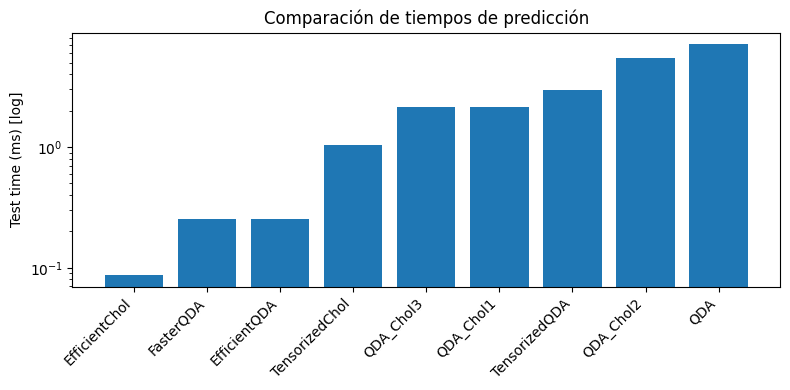

In [65]:
import matplotlib.pyplot as plt

df = summ.copy()

if 'model' not in df.columns:
    df = df.reset_index(names='model')

df = df.sort_values('test_median_ms', ascending=True)

plt.figure(figsize=(8,4))
plt.bar(df['model'], df['test_median_ms'])
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test time (ms) [log]')
plt.title('Comparación de tiempos de predicción')
plt.tight_layout()
plt.show()


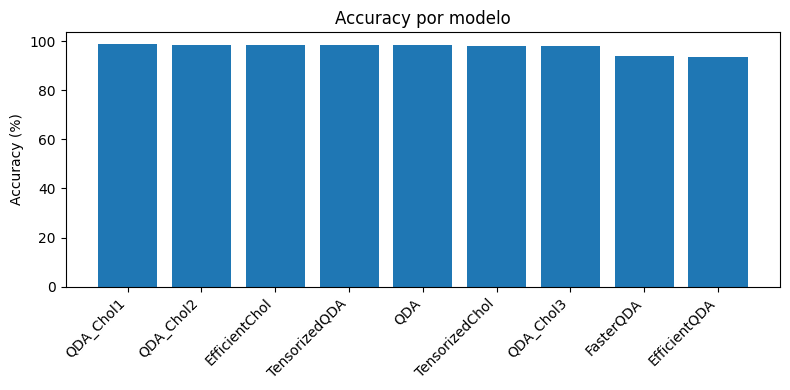

In [67]:
import matplotlib.pyplot as plt

df = summ.copy()
if 'model' not in df.columns:
    df = df.reset_index(names='model')

df['acc_%'] = 100 * df['mean_accuracy']
df = df.sort_values('acc_%', ascending=False)

plt.figure(figsize=(8,4))
plt.bar(df['model'], df['acc_%'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy por modelo')
plt.tight_layout()
plt.show()


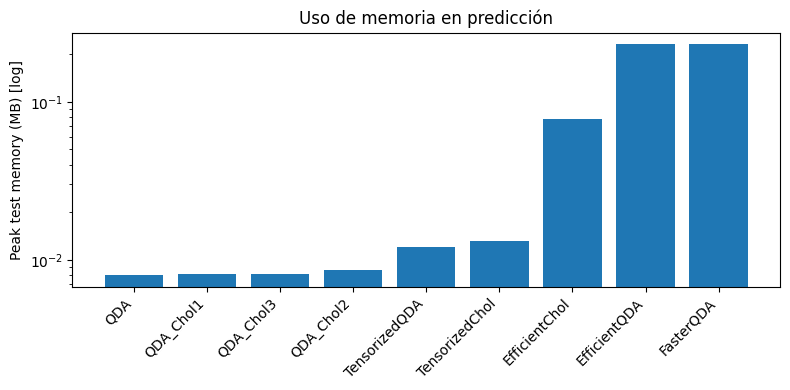

In [68]:
import matplotlib.pyplot as plt

df = summ.copy()
if 'model' not in df.columns:
    df = df.reset_index(names='model')

df = df.sort_values('test_mem_median_mb', ascending=True)

plt.figure(figsize=(8,4))
plt.bar(df['model'], df['test_mem_median_mb'])
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Peak test memory (MB) [log]')
plt.title('Uso de memoria en predicción')
plt.tight_layout()
plt.show()


# Consigna QDA

**Notación**: en general notamos

* $k$ la cantidad de clases
* $n$ la cantidad de observaciones
* $p$ la cantidad de features/variables/predictores

**Sugerencia:** combinaciones adecuadas de `transpose`, `stack`, `reshape` y, ocasionalmente, `flatten` y `diagonal` suele ser más que suficiente. Se recomienda *fuertemente* explorar la dimensionalidad de cada elemento antes de implementar las clases.

## Tensorización

En esta sección nos vamos a ocupar de hacer que el modelo sea más rápido para generar predicciones, observando que incurre en un doble `for` dado que predice en forma individual un escalar para cada observación, para cada clase. Paralelizar ambos vía tensorización suena como una gran vía de mejora de tiempos.

### 1) Diferencias entre `QDA`y `TensorizedQDA`

1. ¿Sobre qué paraleliza `TensorizedQDA`? ¿Sobre las $k$ clases, las $n$ observaciones a predecir, o ambas?
2. Analizar los shapes de `tensor_inv_covs` y `tensor_means` y explicar paso a paso cómo es que `TensorizedQDA` llega a predecir lo mismo que `QDA`.

### 2) Optimización

Debido a la forma cuadrática de QDA, no se puede predecir para $n$ observaciones en una sola pasada (utilizar $X \in \mathbb{R}^{p \times n}$ en vez de $x \in \mathbb{R}^p$) sin pasar por una matriz de $n \times n$ en donde se computan todas las interacciones entre observaciones. Se puede acceder al resultado recuperando sólo la diagonal de dicha matriz, pero resulta ineficiente en tiempo y (especialmente) en memoria. Aún así, es *posible* que el modelo funcione más rápido.

3. Implementar el modelo `FasterQDA` (se recomienda heredarlo de `TensorizedQDA`) de manera de eliminar el ciclo for en el método predict.
4. Mostrar dónde aparece la mencionada matriz de $n \times n$, donde $n$ es la cantidad de observaciones a predecir.
5. Demostrar que
$$
diag(A \cdot B) = \sum_{cols} A \odot B^T = np.sum(A \odot B^T, axis=1)
$$ es decir, que se puede "esquivar" la matriz de $n \times n$ usando matrices de $n \times p$. También se puede usar, de forma equivalente,
$$
np.sum(A^T \odot B, axis=0).T
$$
queda a preferencia del alumno cuál usar.
6. Utilizar la propiedad antes demostrada para reimplementar la predicción del modelo `FasterQDA` de forma eficiente en un nuevo modelo `EfficientQDA`.
7. Comparar la performance de las 4 variantes de QDA implementadas hasta ahora (no Cholesky) ¿Qué se observa? A modo de opinión ¿Se condice con lo esperado?

## Cholesky

Hasta ahora todos los esfuerzos fueron enfocados en realizar una predicción más rápida. Los tiempos de entrenamiento (teóricos al menos) siguen siendo los mismos o hasta (minúsculamente) peores, dado que todas las mejoras siguen llamando al método `_fit_params` original de `QDA`.

La descomposición/factorización de [Cholesky](https://en.wikipedia.org/wiki/Cholesky_decomposition#Statement) permite factorizar una matriz definida positiva $A = LL^T$ donde $L$ es una matriz triangular inferior. En particular, si bien se asume que $p \ll n$, invertir la matriz de covarianzas $\Sigma$ para cada clase impone un cuello de botella que podría alivianarse. Teniendo en cuenta que las matrices de covarianza son simétricas y salvo degeneración, definidas positivas, Cholesky como mínimo debería permitir invertir la matriz más rápido.

*Nota: observar que calcular* $A^{-1}b$ *equivale a resolver el sistema* $Ax=b$.

### 3) Diferencias entre implementaciones de `QDA_Chol`

8. Si una matriz $A$ tiene fact. de Cholesky $A=LL^T$, expresar $A^{-1}$ en términos de $L$. ¿Cómo podría esto ser útil en la forma cuadrática de QDA?
7. Explicar las diferencias entre `QDA_Chol1`y `QDA` y cómo `QDA_Chol1` llega, paso a paso, hasta las predicciones.
8. ¿Cuáles son las diferencias entre `QDA_Chol1`, `QDA_Chol2` y `QDA_Chol3`?
9. Comparar la performance de las 7 variantes de QDA implementadas hasta ahora ¿Qué se observa?¿Hay alguna de las implementaciones de `QDA_Chol` que sea claramente mejor que las demás?¿Alguna que sea peor?

### 4) Optimización

12. Implementar el modelo `TensorizedChol` paralelizando sobre clases/observaciones según corresponda. Se recomienda heredarlo de alguna de las implementaciones de `QDA_Chol`, aunque la elección de cuál de ellas queda a cargo del alumno según lo observado en los benchmarks de puntos anteriores.
13. Implementar el modelo `EfficientChol` combinando los insights de `EfficientQDA` y `TensorizedChol`. Si se desea, se puede implementar `FasterChol` como ayuda, pero no se contempla para el punto.
13. Comparar la performance de las 9 variantes de QDA implementadas ¿Qué se observa? A modo de opinión ¿Se condice con lo esperado?

## Importante:

Las métricas que se observan al realizar benchmarking son muy dependientes del código que se ejecuta, y por tanto de las versiones de las librerías utilizadas. Una forma de unificar esto es utilizando un gestor de versiones y paquetes como _uv_ o _Poetry_, otra es simplemente usando una misma VM como la que provee Colab.

**Cada equipo debe informar las versiones de Python, NumPy y SciPy con que fueron obtenidos los resultados. En caso de que sean múltiples, agregar todos los casos**. La siguiente celda provee una ayuda para hacerlo desde un notebook, aunque como es una secuencia de comandos también sirve para consola.

In [50]:
# Version que deberia funcionar en todos los entornos

import sys
print("Python:", sys.version)

# importlib.metadata es estándar desde Python 3.8; en Colab también está.
try:
    from importlib.metadata import version, PackageNotFoundError
except Exception:
    from importlib_metadata import version, PackageNotFoundError  # backport, por si acaso

for pkg in ["numpy", "scipy"]:
    try:
        print(f"{pkg}:", version(pkg))
    except PackageNotFoundError:
        print(f"{pkg}: NO INSTALADO")

Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
numpy: 2.0.2
scipy: 1.16.1


Versiones

Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]

numpy: 2.0.2

scipy: 1.16.1